# Homework Assignment 20

Consider the two-phase reservoir system below

![img](images/grid.png)

The reservoir has Corey-Brooks parameters for relative permeabilities 

$$
k_{o,\mbox{max}} = 1 \quad k_{w,\mbox{max}} = 0.2 \\
k_{wc} = 0.2, \quad k_{ro} = 0.2 \\
n_w = 3, \quad n_o = 3
$$

The reservoir has an initial water saturation everywhere of $S_i = 0.2$.  Water is injected at the left side and reservoir fluids are produced at the right side (in general, you can assume that any "rate" well with a positive value  is water injector and any "rate" well with negative values produces reservoir fluids.

While this reservoir appears to be one dimensional, you should treat it as if it is two-dimensional with only 1 grid block in the vertical direction.  With this, all of the old tests from [Assignment 17](https://github.com/PGE323M-Fall2018/assignment17/blob/master/assignment17.ipynb) should still pass with the parameters set correctly for single-phase flow (i.e. any multi-phase flow reservoir simulator should be able to replicate a single-phase flow simulator under the correct input parameters).  

Use the template code below and implement the class functions `update_pressure()` and `update_saturation()` using the IMPES method.  You may wish to inherit from both `TwoDimReservoir` class from [Assignment 17](https://github.com/PGE323M-Fall2018/assignment17/blob/master/assignment17.ipynb) where your `fill_matrices()` function should already be correctly defined and the `BuckleyLeverett` class from [Assignment 19](https://github.com/PGE323M-Fall2018/assignment19/blob/master/assignment20.ipynb) where you already implemented functions to compute the relative permeabilities via the Corey-Brooks relations; this is call *multiple inheritance* and can be useful in object oriented programming.

If you are clever, you may be able to complete the functions below without any changes to `fill_matrices()` from [Assignment 17](https://github.com/PGE323M-Fall2018/assignment17/blob/master/assignment17.ipynb) or even `solve_one_step()` from [Assignment 13](https://github.com/PGE323M-Fall2018/assignment17/blob/master/assignment13.ipynb) (This is the way I worked the problem).

**HINTS**

 * You will need to use "upwinding" on the relative permeabilities in computing the transmissibilities
 
 * You will need to modify `compute_accumulation()` to account for the saturation dependant total compressibility.
 
 * You can ignore the water saturation change to accumualation term in the explicit saturation equation.
 
 * If you use inheritance from other assignments, be sure to add the files to your repository upon submission.

In [1]:
import numpy as np

class TwoPhaseFlow():
    
    def __init__(self, inputs):
        
        #applies the initial reservoir pressues to self.p
        self.apply_initial_conditions()
        
        #create an empty list for storing data if plots are requested
        if 'plots' in self.inputs:
            self.p_plot = []
            self.s_plot = []      
        
    def apply_initial_conditions(self):
        '''
            Applies initial pressures to self.p
        '''

        N = self.ngrids 

        self.p = np.ones(N) * self.inputs['initial conditions']['pressure']
        self.saturation = self.Swi * np.ones(N)

        return
                    
        
    def update_pressure(self):
        return
        
    def update_saturation(self):
        return
    
    def solve_one_step(self):
        self.update_pressure()
        self.update_saturation()
        
        
    def solve(self):
        '''
            Solves until "number of time steps"
        '''
        
        for i in range(self.inputs['numerical']['number of time steps']):
            self.solve_one_step()
            
            if i % self.inputs['plots']['frequency'] == 0:
                self.p_plot += [self.p]
                self.s_plot += [self.saturation]
                
        return

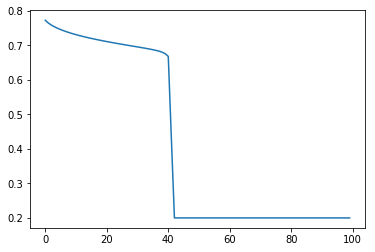

In [7]:
#You can uncomment the code below to test your code in the Notebook

#import matplotlib.pyplot as plt


# def setup():

#     inputs = {
#           'conversion factor': 6.33e-3,
#           'reservoir': {
#             'permeability': 100, #mD
#             'porosity': 0.2,
#             'length': 1000, #ft
#             'height': 10000, #ft
#             'depth': 1, #ft
#             'oil': {
#                 'residual saturation': 0.2,
#                 'corey-brooks exponent': 3.0,
#                 'max relative permeability': 1.0,
#             },
#             'water': {
#                 'critical saturation': 0.2,
#                 'corey-brooks exponent': 3.0,
#                 'max relative permeability': 0.2,
#             },
#           },
#           'fluid': {
#               'water': {
#                   'viscosity': 1.0,
#                   'formation volume factor': 1.0,
#                   'compressibility': 1e-5,
#               },
#               'oil': {
#                   'viscosity': 1.0,
#                   'formation volume factor': 1.0,
#                   'compressibility': 1e-5,
#               }
#           },
#           'initial conditions': {
#               'water saturation': 0.2,
#               'pressure': 1000 #psi
#           },
#         'boundary conditions': {
#             'left': {
#                 'type': 'prescribed flux',
#                 'value': 0
#             },
#             'right': {
#                 'type': 'prescribed flux',
#                 'value': 0 
#             },
#             'top': {
#                 'type': 'prescribed flux',
#                 'value': 0
#             },
#             'bottom': {
#                 'type': 'prescribed flux',
#                 'value': 0
#             }
#         },
#         'wells': {
#           'rate': {
#                     'locations': [(0.01, 0.01), (999.99, 0.01)],
#                     'values': [426.5, -426.5],
#                     'radii': [0.25, 0.25]
#                 },
#         },
#         'numerical': {
#             'number of grids': {
#                 'x': 100,
#                 'y': 1
#             },
#             'solver': 'implicit',
#             'time step': 10, #day
#             'number of time steps' : 100 
#         },
#         'plots': {
#             'frequency': 1
#         }
#     }
    
#     return inputs


# parameters = setup()

# pr = TwoPhaseFlow(parameters)
# pr.solve()

# %matplotlib inline
# plt.plot(pr.saturation)